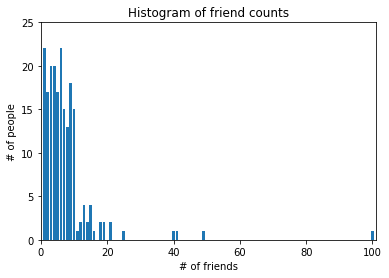

In [1]:
num_friends = [100.0,49,41,40,25,21,21,19,19,18,18,16,15,15,15,15,14,14,13,13,13,13,12,12,11,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,8,8,8,8,8,8,8,8,8,8,8,8,8,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
from collections import Counter
import matplotlib.pyplot as plt
friends_counts = Counter(num_friends)
xs = range(101)
ys = [friends_counts[x] for x in xs]
plt.bar(xs,ys)
plt.axis([0,101,0,25])
plt.title("Histogram of friend counts")
plt.xlabel("# of friends")
plt.ylabel("# of people")
plt.show()

In [2]:
sorted_values = sorted(num_friends)
smallest_value = sorted_values[0]
largest_value = sorted_values[-1]
second_largest_value = sorted_values[-2]

In [3]:
from __future__ import annotations
def mean(x: List[float]) ->float:
    return sum(x)/len(x)
mean = mean(num_friends)
print(mean)
    

7.333333333333333


In [4]:
def _median_odd(xs: List[float]) ->float:
    return sorted(xs)[len(xs) // 2]
def _median_even(xs: List[float]):
    sorted_xs = sorted(xs)
    mid = len(xs) // 2
    return (sorted_xs[mid-1]+sorted_xs[mid]) // 2
def median(v: List[float]):
    return _median_even(v) if len(v) %2==0 else _median_odd(v)
odd = median([1, 10, 2, 9, 5])
even = median([1, 9, 2, 10])
print(f"The odd median is {odd}")
print(f"The even median is {even}")

The odd median is 5
The even median is 5


In [5]:
print(f"The median of friends {median(num_friends)}")

The median of friends 6


In [6]:
def quantile(xs: List[float], p: float) -> float:
    p_index = int(p * len(xs))
    return sorted(xs)[p_index]
assert quantile(num_friends, 0.10) == 1
assert quantile(num_friends, 0.25) == 3
assert quantile(num_friends, 0.75) == 9
assert quantile(num_friends, 0.90) == 13

In [7]:
def mode(x: List[float]) -> float:
    val = Counter(x)
    max_count = max(val.values())
    return [x_i for x_i, count in val.items() if count==max_count]
print(set(mode(num_friends)))

{1, 6}


In [8]:
#This is used to know how much the data is spread
#Higher the value higher the spread
def data_range(xs: float) -> float:
    return max(xs) - min(xs)
spread = data_range(num_friends)
print(spread)

99.0


In [9]:
from scratch.linear_algebra import sum_of_squares

def de_mean(xs: List[float]) -> List[float]:
    """Translate xs by subtracting its mean (so the result has mean 0)"""
    x_bar = sum(xs)/len(xs)
    return [x - x_bar for x in xs]

def variance(xs: List[float]) -> float:
    """Almost the average squared deviation from the mean"""
    assert len(xs) >= 2, "variance requires at least two elements"

    n = len(xs)
    deviations = de_mean(xs)
    return sum_of_squares(deviations) / (n - 1)

assert 81.54 < variance(num_friends) < 81.55
print(variance(num_friends))

81.54351395730716


In [10]:
import math
def standard_deviation(xs: List[float])->float:
    return math.sqrt(variance(xs))
assert 9.02 < standard_deviation(num_friends) < 9.04

In [12]:
#Range and standard deviation have the outlier problem
#So we use IQR(Inter Quartile Range) that returns difference between 75th percentile and 25th percentile
def interquartile_range(xs :List[float]) ->float:
    return quantile(xs ,0.75) - quantile(xs, 0.25)
assert interquartile_range(num_friends) == 6

In [16]:
#correlation
daily_minutes = [1,68.77,51.25,52.08,38.36,44.54,57.13,51.4,41.42,31.22,34.76,54.01,38.79,47.59,49.1,27.66,41.03,36.73,48.65,28.12,46.62,35.57,32.98,35,26.07,23.77,39.73,40.57,31.65,31.21,36.32,20.45,21.93,26.02,27.34,23.49,46.94,30.5,33.8,24.23,21.4,27.94,32.24,40.57,25.07,19.42,22.39,18.42,46.96,23.72,26.41,26.97,36.76,40.32,35.02,29.47,30.2,31,38.11,38.18,36.31,21.03,30.86,36.07,28.66,29.08,37.28,15.28,24.17,22.31,30.17,25.53,19.85,35.37,44.6,17.23,13.47,26.33,35.02,32.09,24.81,19.33,28.77,24.26,31.98,25.73,24.86,16.28,34.51,15.23,39.72,40.8,26.06,35.76,34.76,16.13,44.04,18.03,19.65,32.62,35.59,39.43,14.18,35.24,40.13,41.82,35.45,36.07,43.67,24.61,20.9,21.9,18.79,27.61,27.21,26.61,29.77,20.59,27.53,13.82,33.2,25,33.1,36.65,18.63,14.87,22.2,36.81,25.53,24.62,26.25,18.21,28.08,19.42,29.79,32.8,35.99,28.32,27.79,35.88,29.06,36.28,14.1,36.63,37.49,26.9,18.58,38.48,24.48,18.95,33.55,14.24,29.04,32.51,25.63,22.22,19,32.73,15.16,13.9,27.2,32.01,29.27,33,13.74,20.42,27.32,18.23,35.35,28.48,9.08,24.62,20.12,35.26,19.92,31.02,16.49,12.16,30.7,31.22,34.65,13.13,27.51,33.2,31.57,14.1,33.42,17.44,10.12,24.42,9.82,23.39,30.93,15.03,21.67,31.09,33.29,22.61,26.89,23.48,8.38,27.81,32.35,23.84]

daily_hours = [dm / 60 for dm in daily_minutes]
from scratch.linear_algebra import dot
def covariance(xs :List[float],ys: List[float]) ->float:
    assert len(xs) == len(ys),"They should be same length"
    return dot(de_mean(xs),de_mean(ys))/ (len(xs) - 1)
print(covariance(num_friends, daily_minutes))
print(covariance(num_friends, daily_hours))
assert 22.42 < covariance(num_friends, daily_minutes) < 22.43
assert 22.42 / 60 < covariance(num_friends, daily_hours) < 22.43 / 60

22.425435139573064
0.37375725232621776


In [17]:
def correlation(xs: List(float),ys: List[float]) ->float:
    stddev_x = standard_deviation(xs)
    stddev_y = standard_deviation(ys)
    if stddev_x>0 and stddev_y>0:
        return covariance(xs,ys)/stddev_x/stddev_y
    else:
        return 0
assert 0.24 < correlation(num_friends, daily_minutes) < 0.25
assert 0.24 < correlation(num_friends, daily_hours) < 0.25

Text(0, 0.5, '# of Minutes')

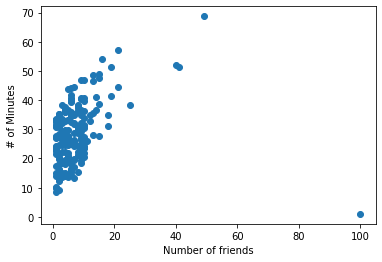

In [22]:
plt.scatter(num_friends,daily_minutes,marker='o')
plt.xlabel("Number of friends")
plt.ylabel("# of Minutes")

In [ ]:
outlier = num_